In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(0)

In [3]:
X, y = fetch_openml('titanic', version=1, return_X_y=True, as_frame=True)

In [4]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
X.shape

(1309, 13)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


Data Cleaning

In [7]:
X.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [8]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,female,25.0000,1.0,2.0,151.5500,S


EDA

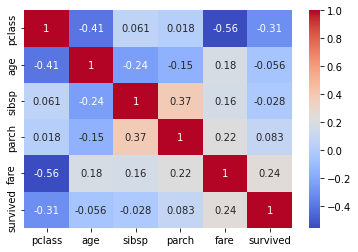

In [9]:
# Merge the features and the label to one DataFrame
df = pd.concat([X, y.astype('float')], axis=1)  

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.savefig('figures/titanic_corr_heatmap.pdf', bbox_inches='tight')

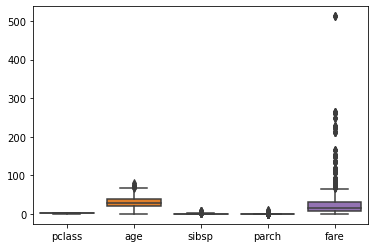

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=X)
plt.savefig('figures/titanic_boxplot.pdf', bbox_inches='tight')

In [11]:
y.value_counts() / y.value_counts().sum()

0    0.618029
1    0.381971
Name: survived, dtype: float64

Data Preprocessing

In [12]:
cat_features = ['pclass', 'sex', 'embarked']

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
num_features = ['age', 'sibsp', 'parch', 'fare']

num_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler()) 
])

In [14]:
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [15]:
model = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier())
])

Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train the Model

In [17]:
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                            

Model Evaluation

In [18]:
train_acc = model.score(X_train, y_train)
print(f'Train accuracy: {train_acc:.4f}')

test_acc = model.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Train accuracy: 0.9713
Test accuracy: 0.7977
